In [1]:
import pandas as pd 
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import os

import warnings

warnings.filterwarnings("ignore")
sb.set_palette("Set3")

from matplotlib import style 

style.use("ggplot")

In [2]:
pwd = os.getcwd()

In [3]:
df = pd.read_csv(pwd + "\\travel insurance.csv")
df.columns = df.columns.str.lower()

### EDA

In [4]:
df.head()

,agency,agency type,distribution channel,product name,claim,duration,destination,net sales,commision (in value),gender,age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


In [5]:
df.shape

(63326, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   agency                63326 non-null  object 
 1   agency type           63326 non-null  object 
 2   distribution channel  63326 non-null  object 
 3   product name          63326 non-null  object 
 4   claim                 63326 non-null  object 
 5   duration              63326 non-null  int64  
 6   destination           63326 non-null  object 
 7   net sales             63326 non-null  float64
 8   commision (in value)  63326 non-null  float64
 9   gender                18219 non-null  object 
 10  age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


In [7]:
#fixing the spacing in feature names
column_names = df.columns

modified_column_names = [column.replace(' ', '_') for column in column_names]

df.columns = modified_column_names

df.head()

,agency,agency_type,distribution_channel,product_name,claim,duration,destination,net_sales,commision_(in_value),gender,age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


In [8]:
df.describe()

,duration,net_sales,commision_(in_value),age
count,63326.000000,63326.000000,63326.000000,63326.000000
mean,49.317074,40.702018,9.809992,39.969981
std,101.791566,48.845637,19.804388,14.017010
min,-2.000000,-389.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.530000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


In [9]:
df.gender.isna().sum()

45107

Need to address the missing gender data later

In [11]:
uniqueprint = ['agency', 'agency_type', 'distribution_channel', 'claim']

for col in uniqueprint:
    print("Unique values for", col, ":")
    print(df[col].unique())
    print()

Unique values for agency :
['CBH' 'CWT' 'JZI' 'KML' 'EPX' 'C2B' 'JWT' 'RAB' 'SSI' 'ART' 'CSR' 'CCR'
 'ADM' 'LWC' 'TTW' 'TST']

Unique values for agency_type :
['Travel Agency' 'Airlines']

Unique values for distribution_channel :
['Offline' 'Online']

Unique values for claim :
['No' 'Yes']



# Encoding

### most of the data is categorical

In [12]:
df['gender'] = df['gender'].replace("F", 1)
df['gender'] = df['gender'].replace("M", 0)

In [17]:
df['agency_type'] = df['agency_type'].replace("Travel Agency", 0)
df['agency_type'] = df['agency_type'].replace("Airlines", 1)

In [15]:
df['distribution_channel'] = df['distribution_channel'].replace("Offline", 0)
df['distribution_channel'] = df['distribution_channel'].replace("Online", 1)

In [19]:
df['claim'] = df['claim'].replace("No", 0)
df['claim'] = df['claim'].replace("Yes", 1)

In [20]:
from sklearn.preprocessing import OneHotEncoder

In [21]:
#one hot encode function
def oneHotEncode (feature):

    global df

    cat_encode = [feature]
    cat_data = df[cat_encode]

    encoder = OneHotEncoder(sparse=False) #dense matrix representation; all features rep'ed explicitly

    dataset_encoded = encoder.fit_transform(cat_data)

    encoded_columns = []

    for i, column in enumerate(cat_encode): #i is used to keep track of the current position while iterating in order to generate unique column names based on unique values in the feature
        unique_values = df[column].unique()
        encoded_columns.extend([f"{column}_{value}" for value in unique_values]) 

    # New dataset with encoded data and appropriate column names
    globals()[f'{feature}_encoded_df'] = pd.DataFrame(dataset_encoded, columns=encoded_columns)

In [22]:
#agency encode
oneHotEncode("agency")

In [23]:
agency_encoded_df.head()

,agency_CBH,agency_CWT,agency_JZI,agency_KML,agency_EPX,agency_C2B,agency_JWT,agency_RAB,agency_SSI,agency_ART,agency_CSR,agency_CCR,agency_ADM,agency_LWC,agency_TTW,agency_TST
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
#product name encode

oneHotEncode("product_name")
product_name_encoded_df.head()

,product_name_Comprehensive Plan,product_name_Rental Vehicle Excess Insurance,product_name_Value Plan,product_name_Basic Plan,product_name_Premier Plan,product_name_2 way Comprehensive Plan,product_name_Bronze Plan,product_name_Silver Plan,product_name_Annual Silver Plan,product_name_Cancellation Plan,...,product_name_Individual Comprehensive Plan,product_name_Spouse or Parents Comprehensive Plan,product_name_Annual Travel Protect Silver,product_name_Single Trip Travel Protect Platinum,product_name_Annual Travel Protect Gold,product_name_Single Trip Travel Protect Gold,product_name_Annual Travel Protect Platinum,product_name_Child Comprehensive Plan,product_name_Travel Cruise Protect,product_name_Travel Cruise Protect Family
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
oneHotEncode("destination")
destination_encoded_df.head()

,destination_MALAYSIA,destination_AUSTRALIA,destination_ITALY,destination_UNITED STATES,destination_THAILAND,"destination_KOREA, DEMOCRATIC PEOPLE'S REPUBLIC OF",destination_NORWAY,destination_VIET NAM,destination_DENMARK,destination_SINGAPORE,...,destination_BHUTAN,destination_RWANDA,destination_SOLOMON ISLANDS,"destination_IRAN, ISLAMIC REPUBLIC OF",destination_GUATEMALA,destination_FRENCH POLYNESIA,destination_TIBET,destination_SENEGAL,destination_REPUBLIC OF MONTENEGRO,destination_BOSNIA AND HERZEGOVINA
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
df_concatenated = pd.concat([df, destination_encoded_df], axis=1)

In [27]:
df_concatenated_2 = pd.concat([df_concatenated, product_name_encoded_df], axis=1)

In [28]:
data = pd.concat([df_concatenated_2, agency_encoded_df], axis=1)

In [65]:
column_names_dropped = ['destination', 'agency', 'product_name']
data = data.drop(data[column_names_dropped], axis=1)

# EDA resumes

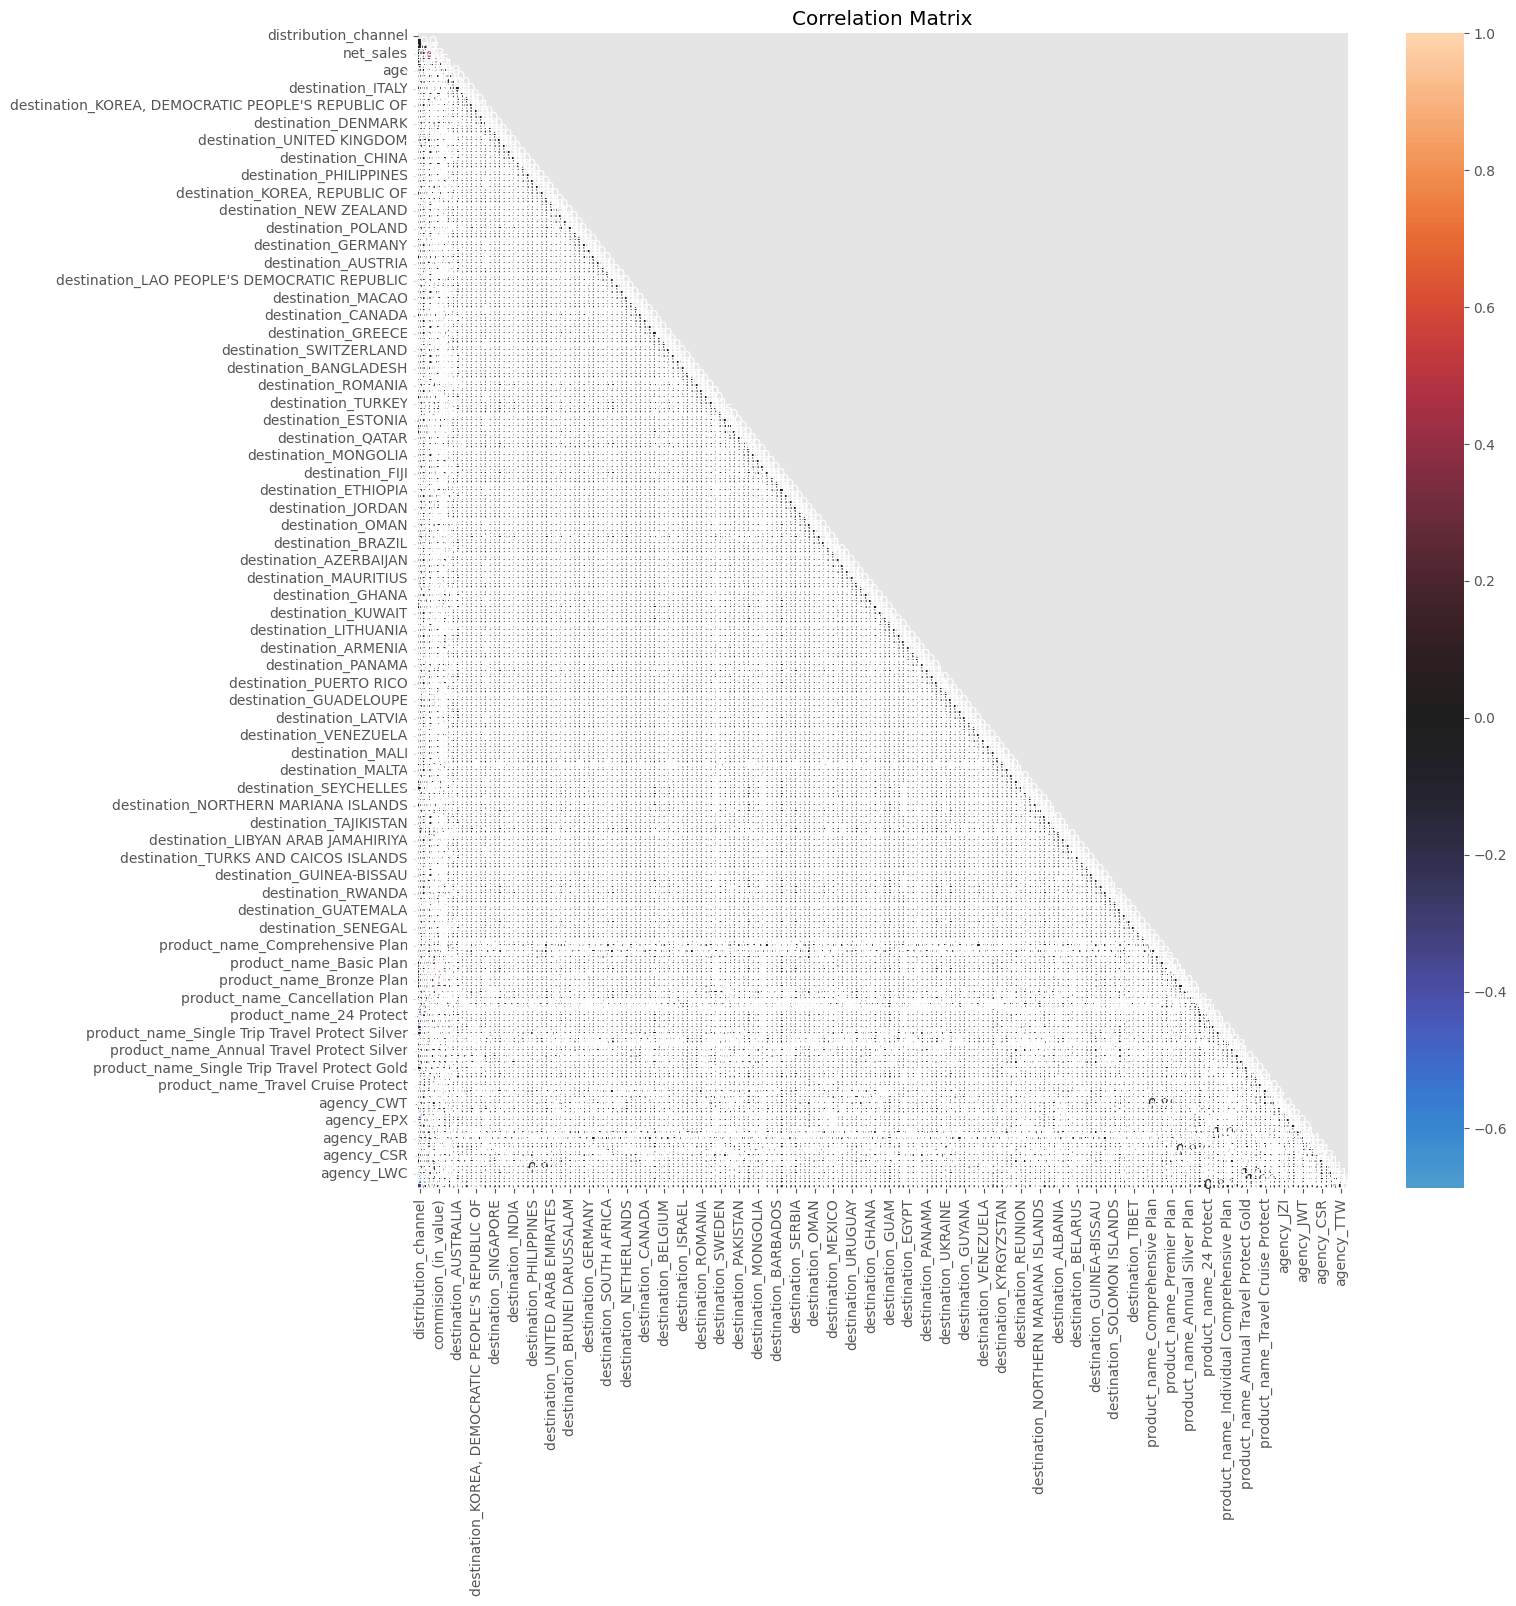

In [74]:
plt.figure(figsize=(15, 15))
correlation = data.corr() 
mask = np.triu(np.ones_like(correlation, dtype=bool))
sb.heatmap(correlation, annot=True, mask=mask, fmt='.2f', center=0)
_ = plt.title("Correlation Matrix")

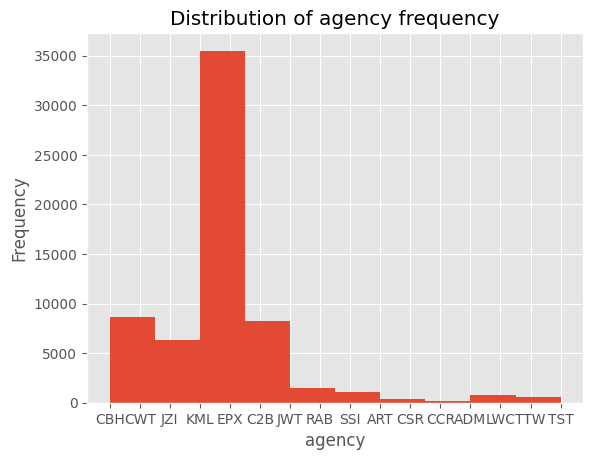

In [31]:
# Create a histogram using Matplotlib
plt.hist(df["agency"], bins=10)

# Set the axis labels and title
plt.xlabel("agency")
plt.ylabel("Frequency")
plt.title("Distribution of agency frequency")

# Show the plot
plt.show()

In [33]:
freq = df.groupby('agency')['claim'].apply(lambda x: (x == 1).sum() / len(x))

for agency, f in freq.items():
    print(f"{agency}: {f:.2%}")

ADM: 0.00%
ART: 0.30%
C2B: 6.62%
CBH: 0.99%
CCR: 1.55%
CSR: 1.16%
CWT: 1.00%
EPX: 0.56%
JWT: 0.53%
JZI: 0.49%
KML: 2.04%
LWC: 5.22%
RAB: 0.14%
SSI: 0.66%
TST: 0.38%
TTW: 4.08%


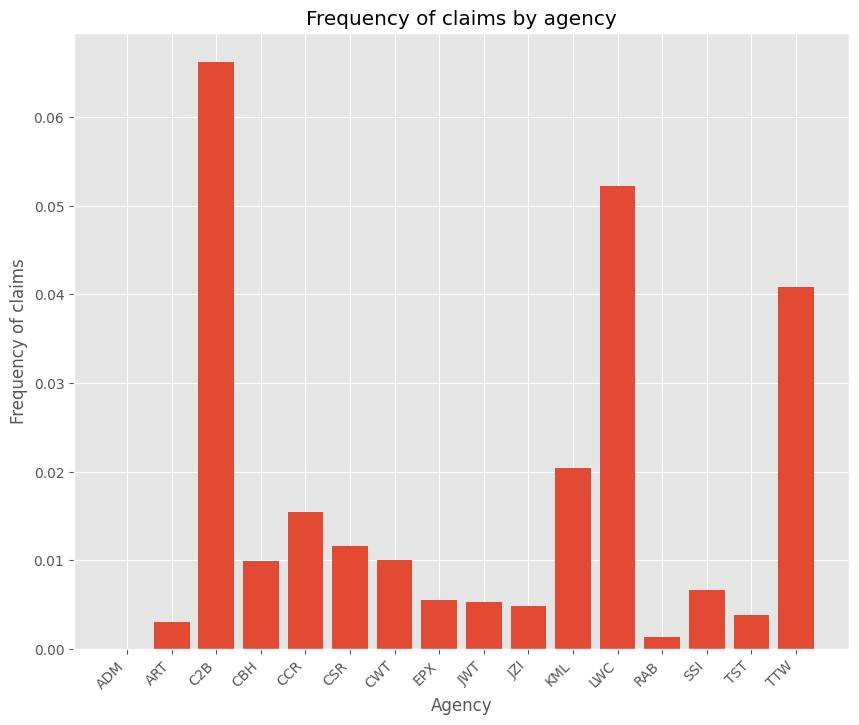

In [34]:
plt.figure(figsize=(10,8))
plt.bar(x=freq.index, height=freq)
plt.xlabel('Agency')
plt.ylabel('Frequency of claims')
plt.title('Frequency of claims by agency')
plt.xticks(rotation=45, ha='right')
plt.show()

In [37]:
freq = df.groupby('product_name')['claim'].apply(lambda x: (x==1).sum() / len(x))

for product, f in freq.items():
    print(f"{product} claims count: {f: .02%}" )

1 way Comprehensive Plan claims count:  0.27%
2 way Comprehensive Plan claims count:  1.08%
24 Protect claims count:  0.00%
Annual Gold Plan claims count:  10.82%
Annual Silver Plan claims count:  11.03%
Annual Travel Protect Gold claims count:  10.00%
Annual Travel Protect Platinum claims count:  5.66%
Annual Travel Protect Silver claims count:  4.65%
Basic Plan claims count:  0.42%
Bronze Plan claims count:  5.19%
Cancellation Plan claims count:  0.24%
Child Comprehensive Plan claims count:  0.00%
Comprehensive Plan claims count:  1.37%
Gold Plan claims count:  5.11%
Individual Comprehensive Plan claims count:  4.05%
Premier Plan claims count:  1.55%
Rental Vehicle Excess Insurance claims count:  1.00%
Silver Plan claims count:  6.27%
Single Trip Travel Protect Gold claims count:  4.90%
Single Trip Travel Protect Platinum claims count:  6.85%
Single Trip Travel Protect Silver claims count:  2.31%
Spouse or Parents Comprehensive Plan claims count:  6.67%
Ticket Protector claims count:

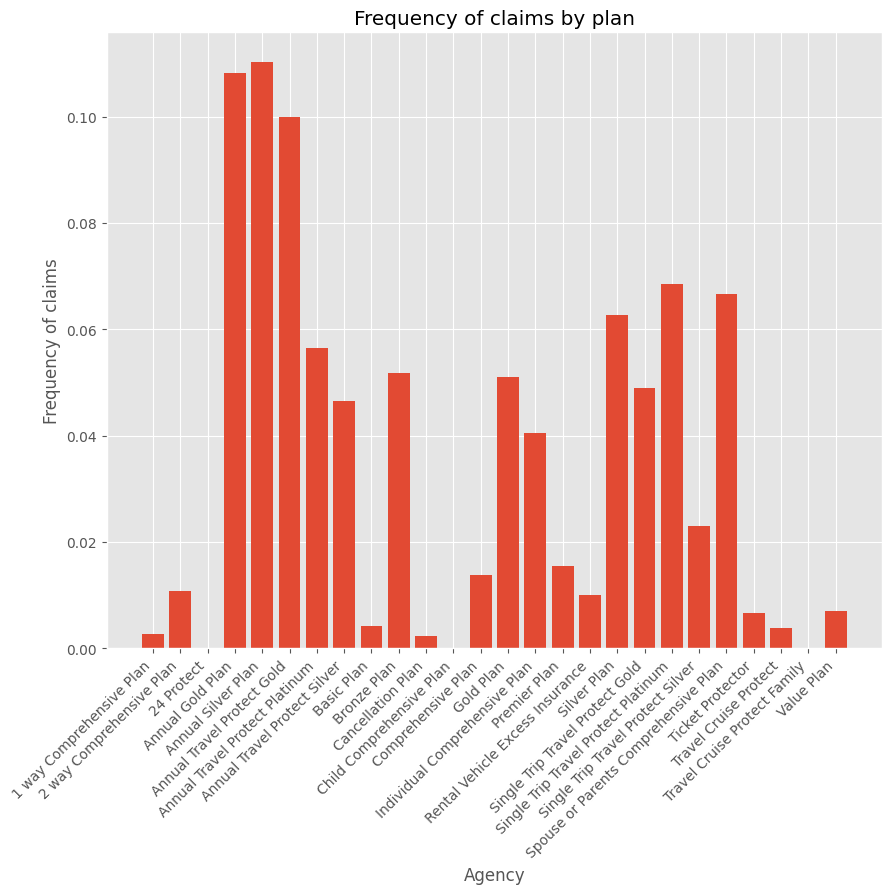

In [38]:
plt.figure(figsize=(10,8))
plt.bar(x=freq.index, height=freq)
plt.xlabel('Agency')
plt.ylabel('Frequency of claims')
plt.title('Frequency of claims by plan')
plt.xticks(rotation=45, ha='right')
plt.show()

In [40]:
for ag in df['agency'].unique():
    plans = df.loc[df['agency'] == ag, 'product_name'].unique()
    print(f"Agency {ag} has the following plans: {', '.join(plans)}")

Agency CBH has the following plans: Comprehensive Plan, Premier Plan
Agency CWT has the following plans: Rental Vehicle Excess Insurance
Agency JZI has the following plans: Value Plan, Basic Plan, Premier Plan
Agency KML has the following plans: Premier Plan, Value Plan
Agency EPX has the following plans: 2 way Comprehensive Plan, Cancellation Plan, 1 way Comprehensive Plan
Agency C2B has the following plans: Bronze Plan, Silver Plan, Annual Silver Plan, Gold Plan, Annual Gold Plan
Agency JWT has the following plans: Value Plan
Agency RAB has the following plans: Value Plan
Agency SSI has the following plans: Ticket Protector
Agency ART has the following plans: 24 Protect, Value Plan
Agency CSR has the following plans: Comprehensive Plan, Premier Plan
Agency CCR has the following plans: Comprehensive Plan, Premier Plan
Agency ADM has the following plans: Value Plan, Premier Plan
Agency LWC has the following plans: Single Trip Travel Protect Silver, Annual Travel Protect Silver, Single 

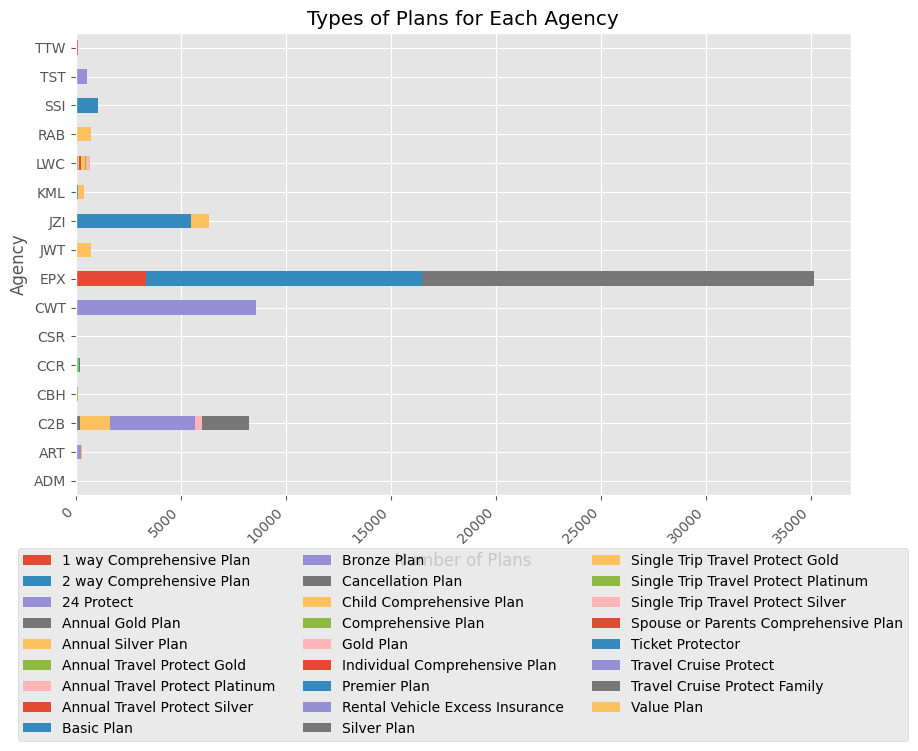

In [43]:
# group by agency and product name and count the number of occurrences
counts = df.groupby(['agency', 'product_name']).size().reset_index(name='count')

# create a pivot table with the counts of each plan type for each agency
pivot_table = counts.pivot(index='agency', columns='product_name', values='count')

# create a horizontal stacked bar chart
ax = pivot_table.plot(kind='barh', stacked=True, figsize=(10,6))

# set axis labels and title
ax.set_xlabel('Number of Plans')
ax.set_ylabel('Agency')
ax.set_title('Types of Plans for Each Agency')

# rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# move legend below chart
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)

plt.show()

### Preprocessing

Recode gender, agency type, distribution channel and claim variables

In [46]:
# calculate the correlation between age and claim = 1
correlation = data[data['claim'] == 1]['age'].dropna().corr(data[data['claim'] == 1]['claim'])

print(correlation)

nan


### MODELLING

In [67]:
df_train = data.copy().dropna()

In [68]:
from sklearn.model_selection import train_test_split

x = df_train.drop("claim", axis= 1)
y = df_train["claim"].copy()

x_train_set, x_test_set, y_train_set, y_test_set = train_test_split(x, y, test_size=0.3, random_state=42)

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

log_reg = LogisticRegression()
log_reg.fit(x_train_set, y_train_set)

log_pred = log_reg.predict(x_test_set)

accuracy = accuracy_score(y_test_set, log_pred)

print("Predictions: ", log_pred)
print("Labels: ", list(y_test_set))

print("Accuracy: ", accuracy)

conf_matrix = confusion_matrix(y_test_set, log_pred)
print("Confusion matrix: ")
print(conf_matrix)

target_names = ["Class 1", "Class 2"]
print(classification_report(y_test_set, log_pred, target_names=target_names))

Predictions:  [0 0 0 ... 0 0 0]
Labels:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [86]:
from sklearn import tree

#no hyperparameters

tree_classifier = tree.DecisionTreeClassifier()
tree_classifier.fit(x_train_set, y_train_set)

tree_class = tree_classifier.predict(x_test_set)

print("Predictions: ", tree_class)
print("Labels: ", list(y_test_set))

accuracy = accuracy_score(y_test_set, tree_class)
print("Accuracy: ", accuracy)

conf_matrix = confusion_matrix(y_test_set, log_pred)
print("Confusion matrix: ")
print(conf_matrix)

target_names = ["Class 1", "Class 2"]
print(classification_report(y_test_set, log_pred, target_names=target_names))

Predictions:  [0 0 0 ... 0 0 0]
Labels:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

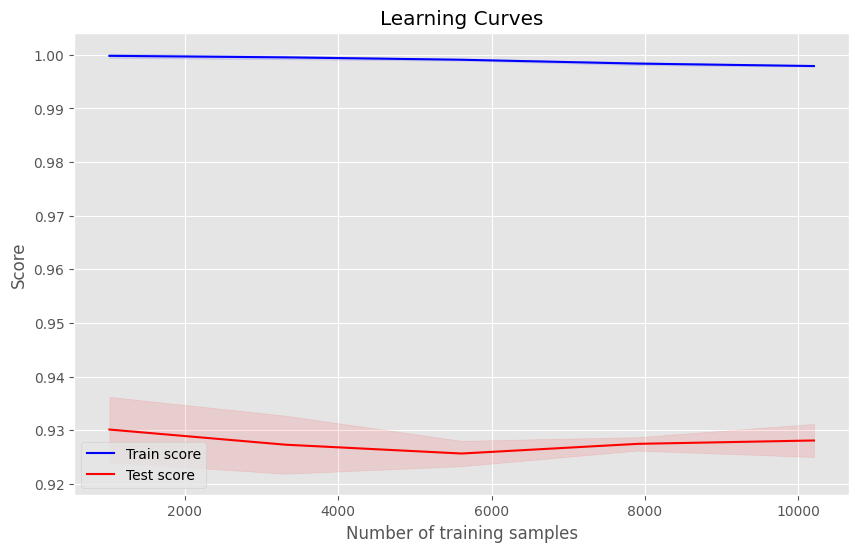

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    tree_classifier, x_train_set, y_train_set, cv=5, scoring='accuracy', n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Train score', color='blue')
plt.plot(train_sizes, test_mean, label='Test score', color='red')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='red')
plt.xlabel('Number of training samples')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend(loc='best')
plt.show()


Best Hyperparameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy:  0.9690815953165021
Confusion matrix: 
[[5297    0]
 [ 169    0]]
              precision    recall  f1-score   support

     Class 1       0.97      1.00      0.98      5297
     Class 2       0.00      0.00      0.00       169

    accuracy                           0.97      5466
   macro avg       0.48      0.50      0.49      5466
weighted avg       0.94      0.97      0.95      5466



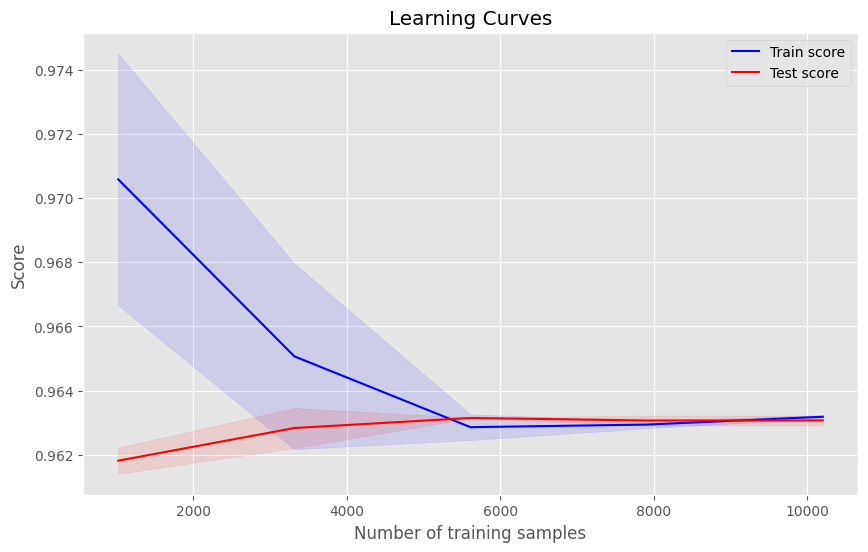

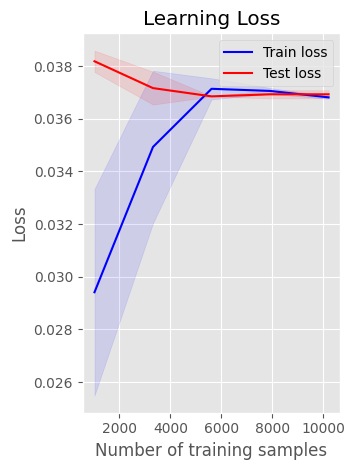

In [95]:
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.tree import DecisionTreeClassifier

#grid_search hyperparameter selection

tree_classifier = DecisionTreeClassifier()

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(tree_classifier, param_grid, cv=5, scoring='accuracy') #cv = cross validation
grid_search.fit(x_train_set, y_train_set)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

# Predict on the test set using the best model
tree_class = best_model.predict(x_test_set)

# Print accuracy and confusion matrix
accuracy = accuracy_score(y_test_set, tree_class)
print("Accuracy: ", accuracy)

conf_matrix = confusion_matrix(y_test_set, tree_class)
print("Confusion matrix: ")
print(conf_matrix)

target_names = ["Class 1", "Class 2"]
print(classification_report(y_test_set, tree_class, target_names=target_names))

# Plot the learning curves
train_sizes, train_scores, test_scores = learning_curve(
    best_model, x_train_set, y_train_set, cv=5, scoring='accuracy', n_jobs=-1) #all cpu cores utilized 

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Train score', color='blue')
plt.plot(train_sizes, test_mean, label='Test score', color='red')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='red')
plt.xlabel('Number of training samples')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend(loc='best')
plt.show()

plt.subplot(1, 2, 2)
plt.plot(train_sizes, 1 - train_mean, label='Train loss', color='blue')
plt.plot(train_sizes, 1 - test_mean, label='Test loss', color='red')
plt.fill_between(train_sizes, 1 - (train_mean + train_std), 1 - (train_mean - train_std), alpha=0.1, color='blue')
plt.fill_between(train_sizes, 1 - (test_mean + test_std), 1 - (test_mean - test_std), alpha=0.1, color='red')
plt.xlabel('Number of training samples')
plt.ylabel('Loss')
plt.title('Learning Loss')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

Looks okay - possible underfitting based on the decrease in accuracy during that plateaus at approximately 5700 samples 